In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import sys

# Task 1

---

In [4]:
# Get project root 
if 'Notebooks' in str(Path.cwd()) or 'notebooks' in str(Path.cwd()):
    project_root = Path.cwd().parent
else:
    project_root = Path.cwd()

task1_path = project_root / 'resources' / 'task_1'

# Load the data
data1 = pd.read_excel(task1_path / 'supplier_data1.xlsx')
data2 = pd.read_excel(task1_path / 'supplier_data2.xlsx')

## 1) Label Formatting
   
- Some variable names have inconsistent capitalization. I converted all names to lowercase and replaced spaces with underscores.  

- I am also making the assumption that 'quantity' in dataset1 is wrongly named as it returns float. Moreover a variable named 'quantity' (in int) is also present in dataset2.  
  After a quick research, I found that 'a5/a80' is a standard mechanical properties of metal, so I took the decision to substitute 'quantity' with 'a5/a80'. 

- I changed the two variables named 'description' with more inforamtive names: 
    - defect_description
    - material_description


In [4]:
print("Before renaming:")
print(data1.columns)
print(data2.columns)

data1.rename(columns={
    'Quality/Choice': 'quality_choice',
    'Grade': 'grade',
    'Finish': 'finish',
    'Thickness (mm)': 'thickness_mm',
    'Width (mm)': 'width_mm',
    'Description': 'defect_description',
    'Gross weight (kg)': 'gross_weight_kg',
    'RP02': 'rp02',
    'RM': 'rm',
    'Quantity': 'a5/a80',
    'AG': 'ag',
    'AI': 'ai'
}, inplace=True)

data2.rename(columns={
    'Material': 'material',
    'Description': 'material_description',
    'Article ID': 'article_id',
    'Weight (kg)': 'weight_kg',
    'Quantity': 'quantity',
    'Reserved': 'reserved'
}, inplace=True)

print("After renaming:")
print(data1.columns)
print(data2.columns)

Before renaming:
Index(['Quality/Choice', 'Grade', 'Finish', 'Thickness (mm)', 'Width (mm)',
       'Description', 'Gross weight (kg)', 'RP02', 'RM', 'Quantity', 'AG',
       'AI'],
      dtype='object')
Index(['Material', 'Description', 'Article ID', 'Weight (kg)', 'Quantity',
       'Reserved'],
      dtype='object')
After renaming:
Index(['quality_choice', 'grade', 'finish', 'thickness_mm', 'width_mm',
       'defect_description', 'gross_weight_kg', 'rp02', 'rm', 'a5/a80', 'ag',
       'ai'],
      dtype='object')
Index(['material', 'material_description', 'article_id', 'weight_kg',
       'quantity', 'reserved'],
      dtype='object')


## 2) Type conversion

- 'width_mm' was stored as an integer, while 'thickness_mm' was a float. I converted 'width_mm' to float for consistency.
- I converted 'article_id' to object as it is amore logical type for an ID
- The 'defect_description' column contains text values describing defects or quality issues. To ensure consistency, all text in this column was converted to lowercase to eliminate inconsistencies

In [5]:
# Convert width_mm to float for consistency
# Round thickness_mm and width_mm to 2 decimal places for better readability
data1['thickness_mm'] = data1['thickness_mm'].astype('float').round(2)
data1['width_mm'] = data1['width_mm'].astype('float').round(2)

# Convert article_id to object type
data2['article_id'] = data2['article_id'].astype('object')

# Convert defect_description to lower case
str_cols_data1 = ['defect_description']
data1[str_cols_data1] = data1[str_cols_data1].apply(lambda col: col.str.lower())

In [6]:
# Translate english text in data2 to german and convert to lower case
material_description_translation = {
    'Material is Oiled': 'Material ist geölt',
    'Material is Painted': 'Material ist lackiert', 
    'Material is not Oiled': 'Material ist nicht geölt'
}

reserved_translation = {
    'NOT RESERVED': 'nicht reserviert',
    'VANILLA': 'vanilla'
}

data2['reserved'] = data2['reserved'].map(reserved_translation).str.lower()
data2['material_description'] = data2['material_description'].map(material_description_translation).str.lower()

## 3) Check for duplicates and missing values

In [7]:
datasets = [data1, data2]
for i, dataset in enumerate(datasets, start=1):
    print(f"Dataset {i}:")
    print(f"Missing values:\n{dataset.isnull().sum()}")
    print(f"Duplicate rows: {dataset.duplicated().sum()}\n")


Dataset 1:
Missing values:
quality_choice        0
grade                 0
finish                0
thickness_mm          0
width_mm              0
defect_description    0
gross_weight_kg       0
rp02                  0
rm                    0
a5/a80                0
ag                    0
ai                    0
dtype: int64
Duplicate rows: 0

Dataset 2:
Missing values:
material                0
material_description    0
article_id              0
weight_kg               0
quantity                0
reserved                0
dtype: int64
Duplicate rows: 0



## 4) Visual Inspection
- There are some values in 'rp02', 'rm', 'ag', 'a5/a80', and 'ai' that are equal zero.  
- This may be due to missing measurements, but I decided to keep these values as they are since I don't have sufficient information to determine whether this represents true zero values or is due to other factors.
- Additionally, the pattern in the plot suggests the presence of discrete categories. This supports my decision to keep the missing values as they are, since they likely reflect either intrinsic properties of the steel or measurements that are not applicable for certain products

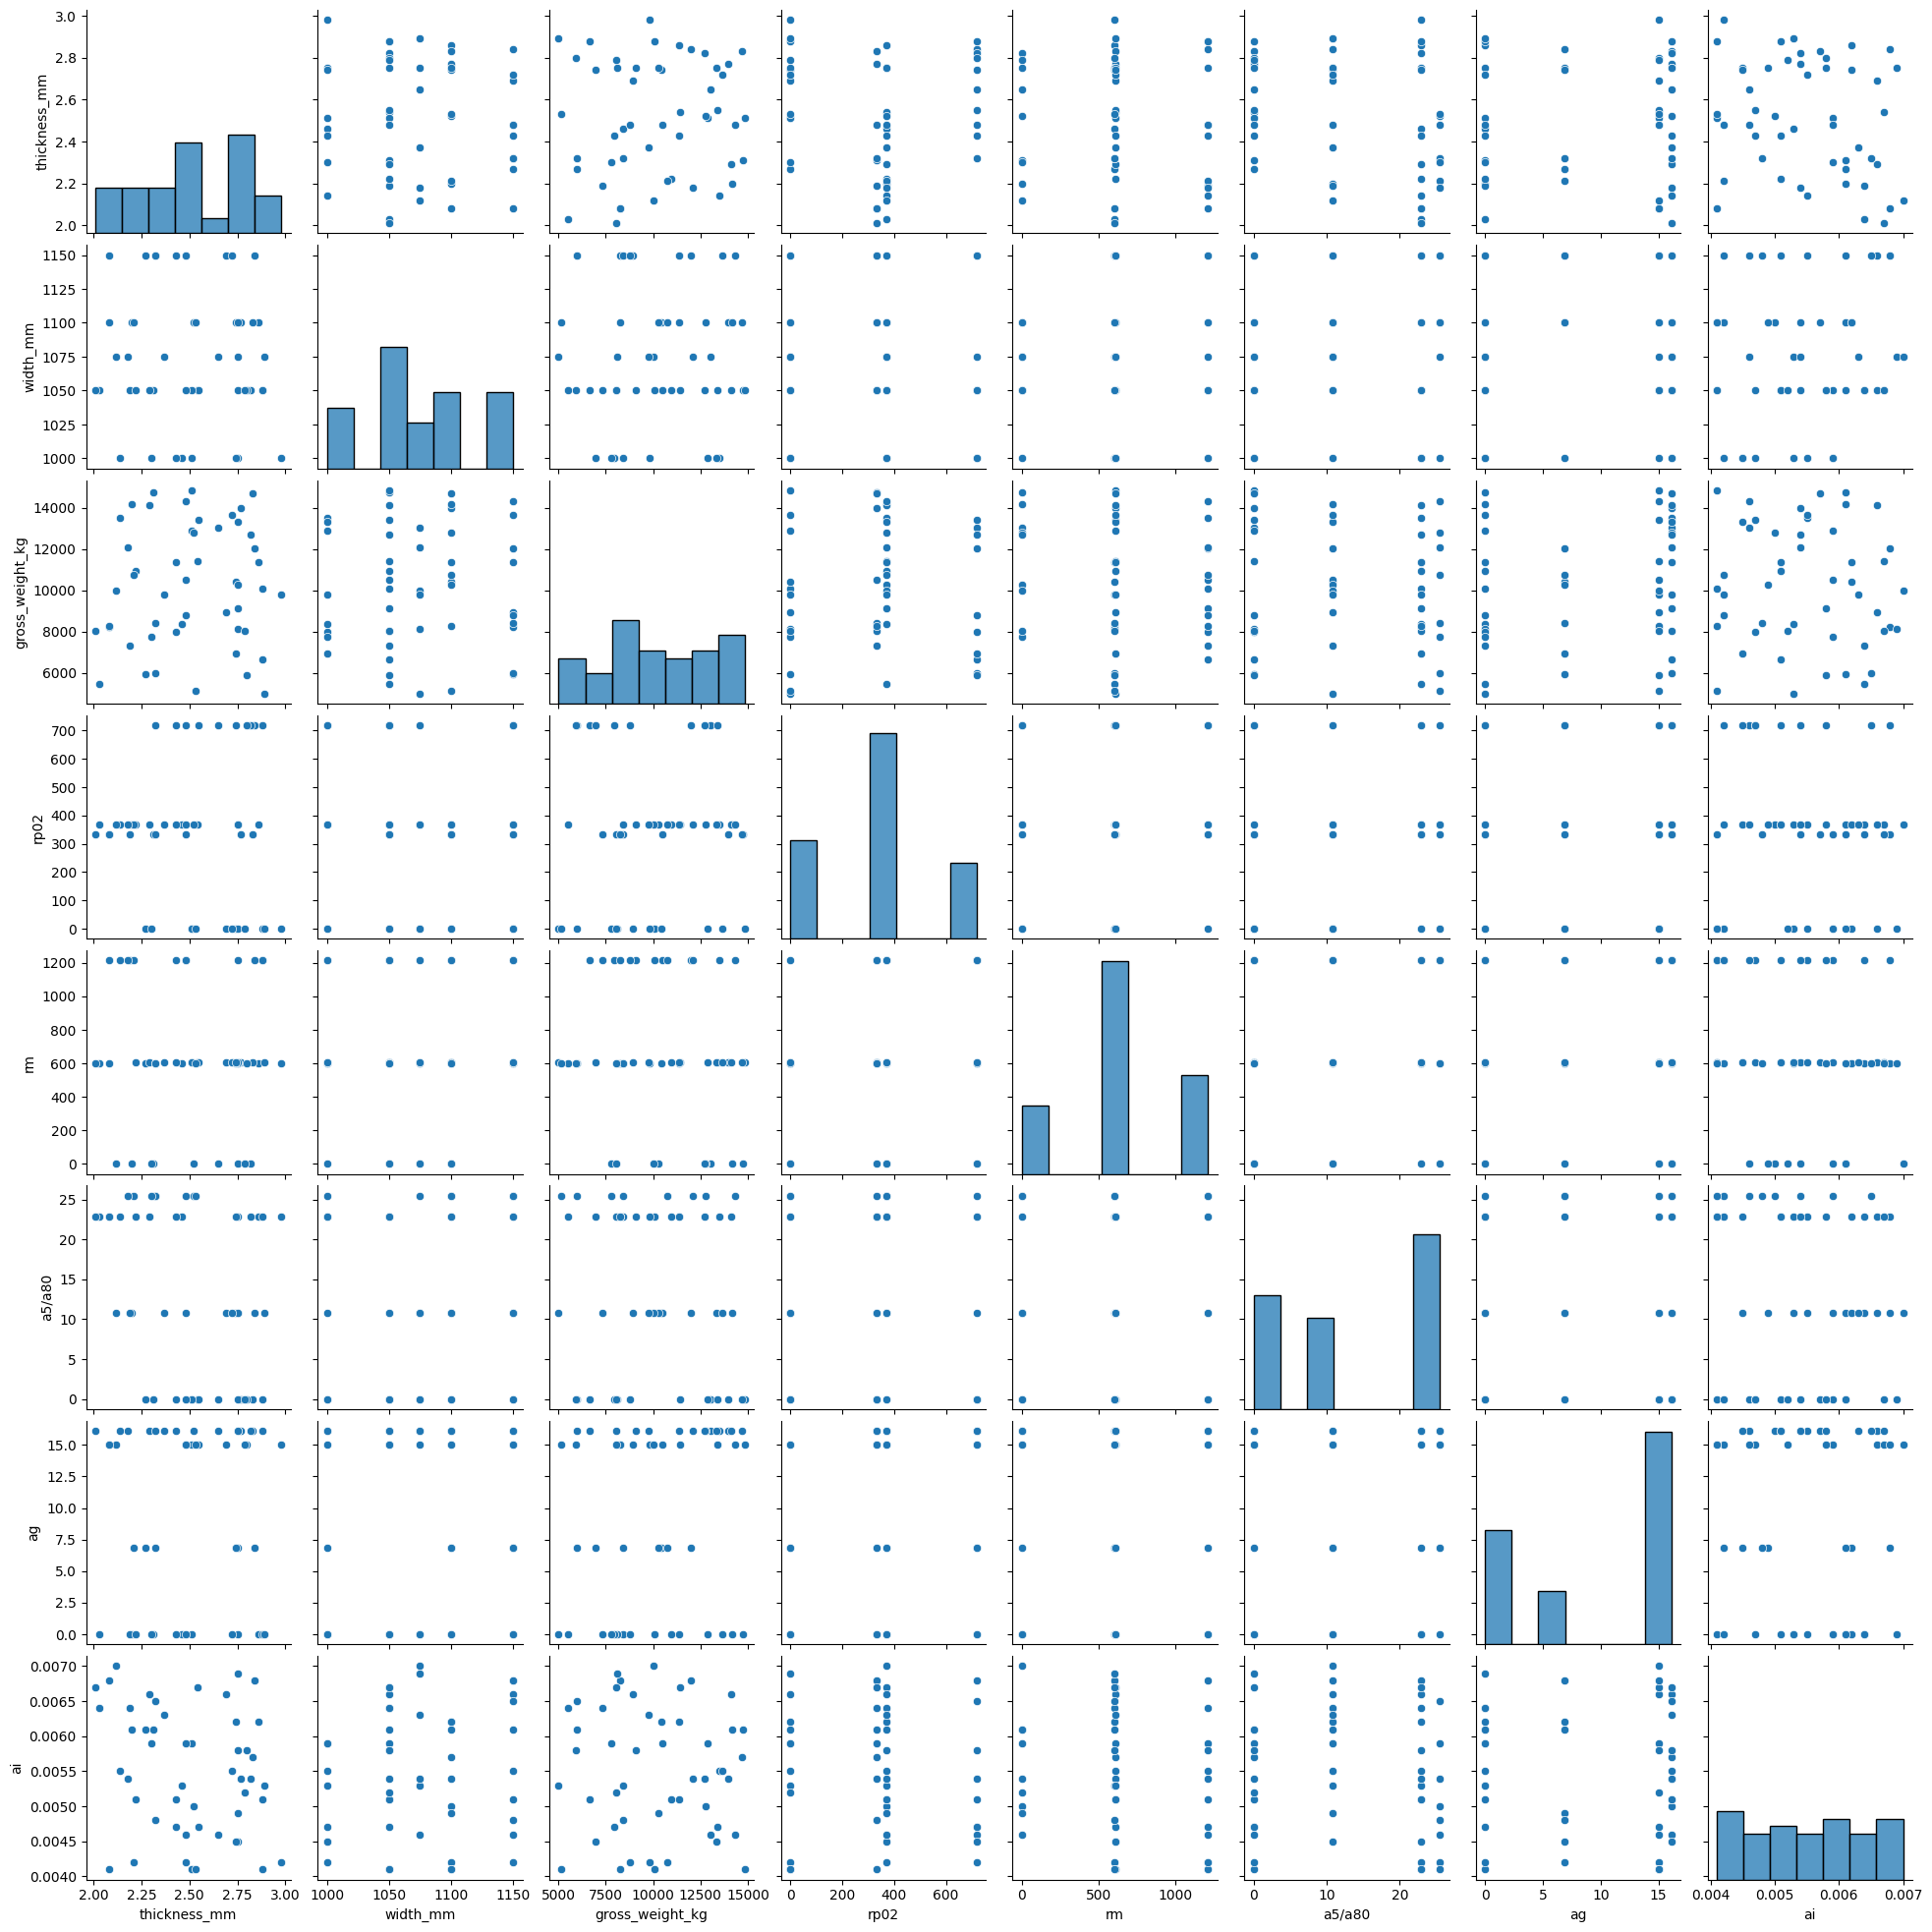

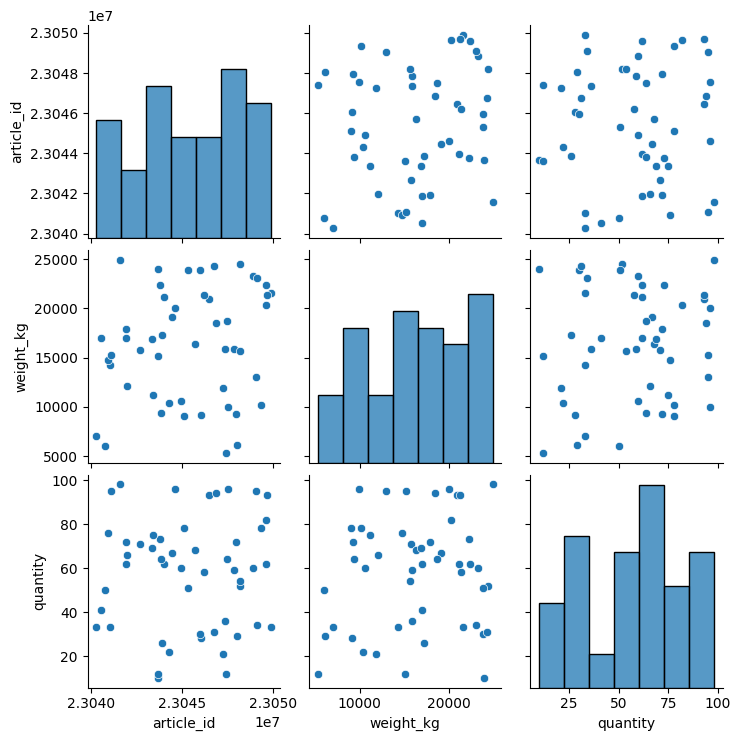

In [8]:
# Visualize numerical variables
sns.pairplot(data1)
sns.pairplot(data2)

## 4) Dataframes Join

This step required some consideration. I decided to join the two datasets along the column axis, treating them as complementary information about the same entities. The strongest evidence supporting this choice was the identical number of rows in both datasets. I performed the join as explicitly requested, but I still have many doubts about whether it was the most appropriate approach.

### Reflections
- Joining datasets without a unique reference key is generally bad practice, since there is no guarantee that the rows align correctly. It is possible that the datasets refer to the same materials but are ordered differently.  
- The presence of unrelated descriptions argues against my chosen join, as it suggests that the first dataset may correspond to batches of materials with issues, while the other dataset to processing descriptions of other material types.  
- JStacking along the row axis would likely have been even less meaningful, as it would generate a sparse dataset and artificially merge unrelated information.  
- For these reasons, I proceeded with the column-wise join, while acknowledging its suboptimality.  

In [ ]:
# Merge the two datasets along the column axis
dataset_merged = pd.concat([data1, data2], axis=1) 

# Store the dataset as csv
output_path = Path.cwd() / 'Results'
dataset_merged.to_csv(output_path / 'inventory_dataset.csv', index=False)